In [18]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Relative moments
## Motivation
Let $X \sim H_1$ and $Y \sim H_2$. For the first moment of it makes sense to look at, for example,:
$$d(Y,X) = E[Y] - E[X]$$
as a measure of difference between means. For the second moment or standard deviation instead of difference one can calculate the ratio, e.g.:
$$r(Y,X) = \sigma(Y) / \sigma(X)$$

These measures of discrepancy could be also be thought of as a measure of discrepancy from a distribution with 0 mean and 1 variance. This way the interpretation is that we obrain the relative measure of discrepancy with respect to the standardised distribution.
That is, we could first calculate $E[X]$ and $\sigma(X)$ and then calculate:
$$\tilde{d}(Y,X) = E\left[\frac{Y - E[X]}{\sigma(X)}\right] - E\left[\frac{X - E[X]}{\sigma(X)}\right] = E[\tilde{Y}_X] - E[\tilde{X}_X]$$
$$\tilde{r}(Y,X) = \sigma\left( \frac{Y - E[X]}{\sigma(X)} \right) / \sigma\left( \frac{X - E[X]}{\sigma(X)} \right) = \sigma(\tilde{Y}_X) / \sigma(\tilde{X}_X)$$
**Question**:
Is there a similar measure of relative difference for higher moments?

## Example 1: Normal Distribution
Let $X \sim N(0,1)$ and $Y \sim N(1, 2^2)$.
Write:
$$X = \mu_X + \sigma_X \epsilon \quad \epsilon \sim N(0,1)$$
$$Y = \mu_Y + \sigma_Y \epsilon \quad \epsilon \sim N(0,1) $$
Then:
$$d(Y,Y) = \tilde{d}(Y,X) = 1$$
$$r(Y,X) = \tilde{r}(Y,X) = 2$$

Let $Z \sim N(2,4^2)$ and $V \sim N(4, 8^2)$. Write:
$$Z = \mu_Z + \sigma_Z \epsilon \quad \epsilon \sim N(0,1)$$
$$V = \mu_V + \sigma_V \epsilon \quad \epsilon \sim N(0,1) $$
After the standardisation w.r.t. Z we can write:
$$\tilde{Z}_Z = \epsilon \quad \epsilon \sim N(0,1)$$
$$\tilde{V} = (\mu_V - \mu_Z)/\sigma_Z + \sigma_V / \sigma_Z \epsilon \quad \epsilon \sim N(0,1) $$
Then:
$$d(V,Z) = 2, \quad \tilde{d}(V,Z) = d(\tilde{V}_Z,\tilde{Z}_Z) = 1$$
$$r(V,Z) = \tilde{r}(V,Z) = 2$$

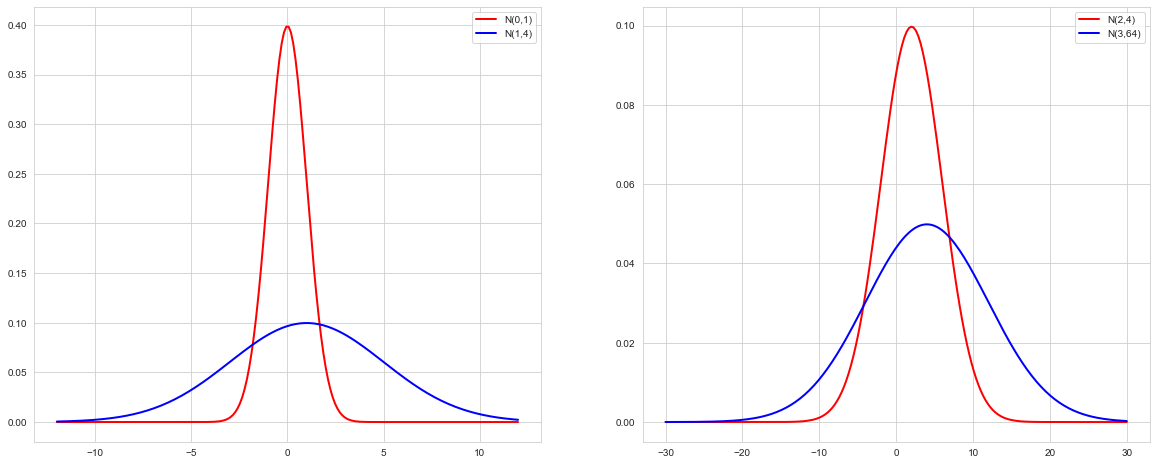

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
x = np.linspace(-12, 12, 200)
axs[0].plot(x, st.norm.pdf(x, loc=0, scale=1), 'r-', lw=2, label='N(0,1)')
axs[0].plot(x, st.norm.pdf(x, loc=1, scale=4), 'b-', lw=2, label='N(1,4)')
axs[0].legend(loc="best")
x = np.linspace(-30, 30, 200)
axs[1].plot(x, st.norm.pdf(x, loc=2, scale=4), 'r-', lw=2, label='N(2,4)')
axs[1].plot(x, st.norm.pdf(x, loc=4, scale=8), 'b-', lw=2, label='N(3,64)')
axs[1].legend(loc="best")
plt.show()

In [48]:
X = st.norm()
Y = st.norm(loc=1, scale=2)
print("d(Y,X) =",Y.mean() - X.mean())
print("r(Y,X) =", Y.std()/ X.std())

d(Y,X) = 1.0
r(Y,X) = 2.0


In [49]:
Z = st.norm(loc=2, scale=4);
V = st.norm(loc=4, scale=8)
print("d(V,Z) =",V.mean() - Z.mean())
print("r(V,Z) =",V.std() / Z.std())

d(V,Z) = 2.0
r(V,Z) = 2.0


## Problem
The standardisation trick is limited as it only corrects for mean and standard deviation. What could we do to measure the discrepancy of higher moments from the standard normal benchmark?
### Idea 1: Inverse normal CDF of CDF
Let $X \sim H_1$ and $Y \sim H_2$ and let $F_1(x) = P(X<x)$ and $F_2(y) = P(Y<y)$. Then:
$$\Phi^{-1}(F_1(X)) \sim N(0,1)$$
$$\Phi^{-1}(F_1(Y)) \sim H_3$$
Doing these transformation we transform $X$ to standard normal and $Y$ undergoes the same transformation as $X$ which (I hope) will result in a ``distribution relative to standard base''.

## Example 2: Skew-Normal Distribution
Let $X \sim N(0,1)$ and $Y \sim SN(-1.22, 1.58^2, 4)$ so that $E[Y]=0$, $E[Y^2]=1$, $E[Y^3]=0.78$, $E[Y^4]=3.63$

In [15]:
mu1 = 0
s1 = 1
a1 = 4
d1 = a1 / np.sqrt(1 + a1**2)
scale1 = s1 / np.sqrt(1 - 2 * d1**2 / np.pi)
loc1 = mu1 - scale1 * d1 * np.sqrt(2 / np.pi)

X = st.norm()
Y = st.skewnorm(a=a1, loc=loc1, scale=scale1) 
print(Y.moment(1), Y.moment(2), Y.moment(3), Y.moment(4))

-0.0 0.9999999998999701 0.7844267553075845 3.6327847264886532


In [16]:
print(loc1, scale1)

-1.2226335886592767 1.5795040019315751


In terms of skewness Y has skew of 0.78 whereas X has skew 0. Next question is, does it make sense to talk about relative skew.

## Example 4: Skew-Normal Relative

In [19]:
mu3 = 0
s3 = 1
a3 = 1
d3 = a3 / np.sqrt(1 + a3**2)
scale3 = s3 / np.sqrt(1 - 2 * d3**2 / np.pi)
loc3 = mu3 - scale3 * d3 * np.sqrt(2 / np.pi)
V = st.skewnorm(a=a3, loc=loc3, scale=scale3) 

mu4 = 0
s4 = 1
a4 = 7
d4 = a4 / np.sqrt(1 + a4**2)
scale4 = s4 / np.sqrt(1 - 2 * d4**2 / np.pi)
loc4 = mu4 - scale4 * d4 * np.sqrt(2 / np.pi)
Z = st.skewnorm(a=a4, loc=loc4, scale=scale4) 

In [159]:
print(V.moment(1), V.moment(2), V.moment(3), V.moment(4))

-0.0 0.9999999998999701 0.7844267553075845 3.6327847264886532


In [160]:
print(Z.moment(1), Z.moment(2), Z.moment(3), Z.moment(4))

C:\Users\BearButis\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


-1.4388903208118273e-16 0.8939278146674221 -1.4396562707090017 2.5293243418568863


In [3]:
(Z.rvs(size=10000000)**3).mean() - (V.rvs(size=1000000)**3).mean()

0.7730823825837112

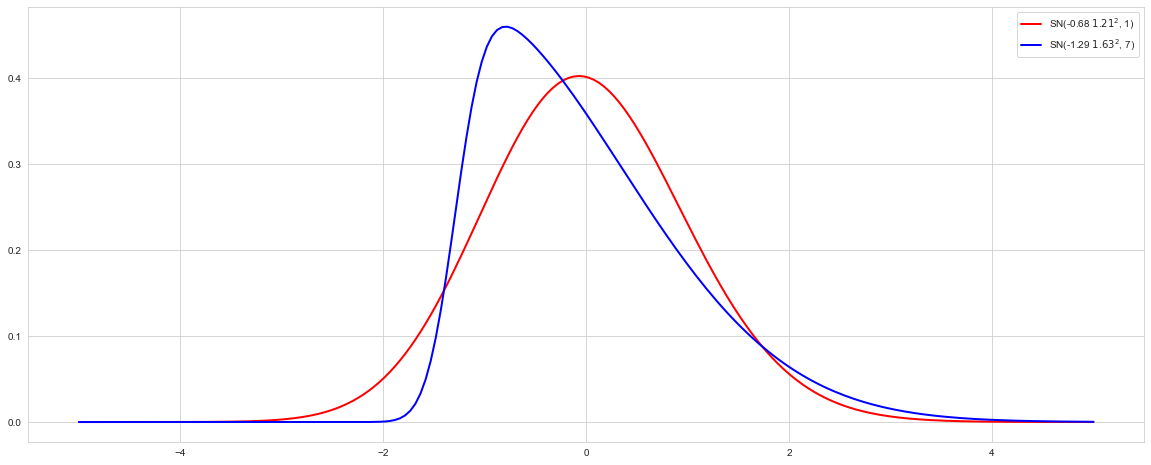

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(20, 8))
x = np.linspace(-5, 5, 200)
axs.plot(x, st.skewnorm.pdf(x, a=a3, loc=loc3, scale=scale3), 'r-', lw=2, label='SN(-0.68 $1.21^2$, 1)')
axs.plot(x, st.skewnorm.pdf(x, a=a4, loc=loc4, scale=scale4), 'b-', lw=2, label='SN(-1.29 $1.63^2$, 7)')
axs.legend(loc="best")
plt.show()

In [6]:
rv3 = st.skewnorm.rvs(size=10000, a=a3, loc=loc3, scale=scale3)
rv4 = st.skewnorm.rvs(size=100000, a=a4, loc=loc4, scale=scale4)
rv3_t = st.norm.ppf(st.skewnorm(a=a3, loc=loc3, scale=scale3).cdf(rv3))
rv4_t = st.norm.ppf(st.skewnorm(a=a3, loc=loc3, scale=scale3).cdf(rv4))

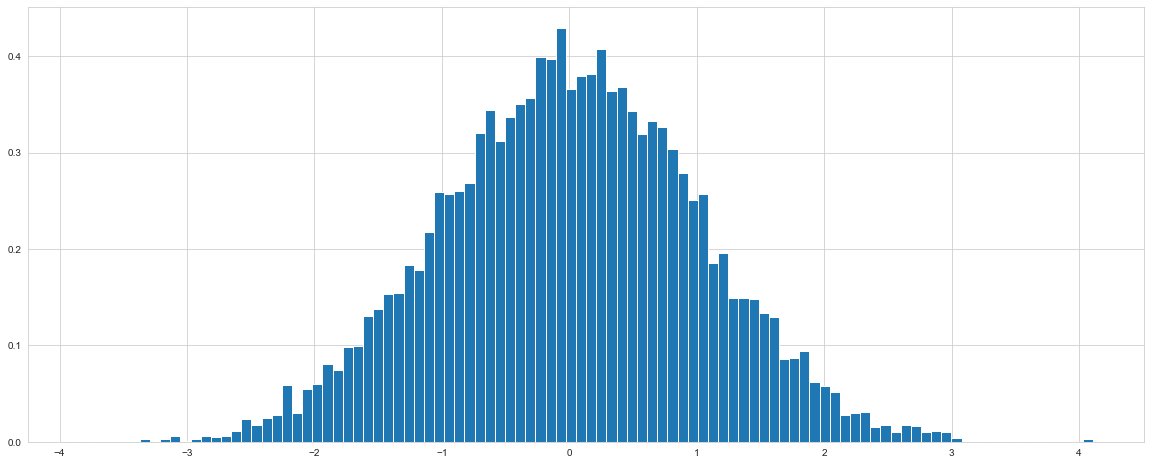

In [7]:
c = 1
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.hist(rv3_t, density=True, bins=100)
plt.show()

##### Try to fit skew normal to the newly transformed random variables which got changed w.r.t rv3.

In [8]:
a4_t, loc4_t, scale4_t = st.skewnorm.fit(rv4_t)

In [17]:
print(a4_t, loc4_t, scale4_t)

6.203411280080884 -1.2798510646472163 1.611926836300317


In [9]:
(rv4_t**3).mean()

0.7255414392524092

In [10]:
(rv3_t**3).mean()

0.017107295470010005

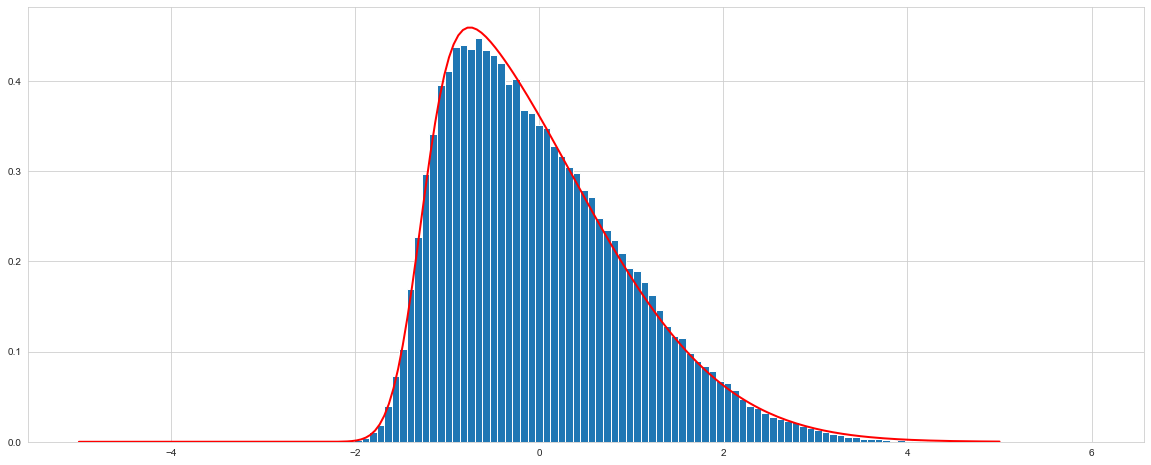

In [11]:
c = 1
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.hist(rv4_t, density=True, bins=100)
x = np.linspace(-5, 5, 200)
ax.plot(x, st.skewnorm.pdf(x, a=a4_t, loc=loc4_t, scale=scale4_t), 'r-', lw=2, label='N(2,4)')
plt.show()
plt.show()

In [98]:
print(rv1_t.mean(), rv1_t.std(), (rv1_t**2).mean(), (rv1_t**3).mean())

0.0004258582462711099 1.0001768534950284 1.000353919622461 0.4562303063064138


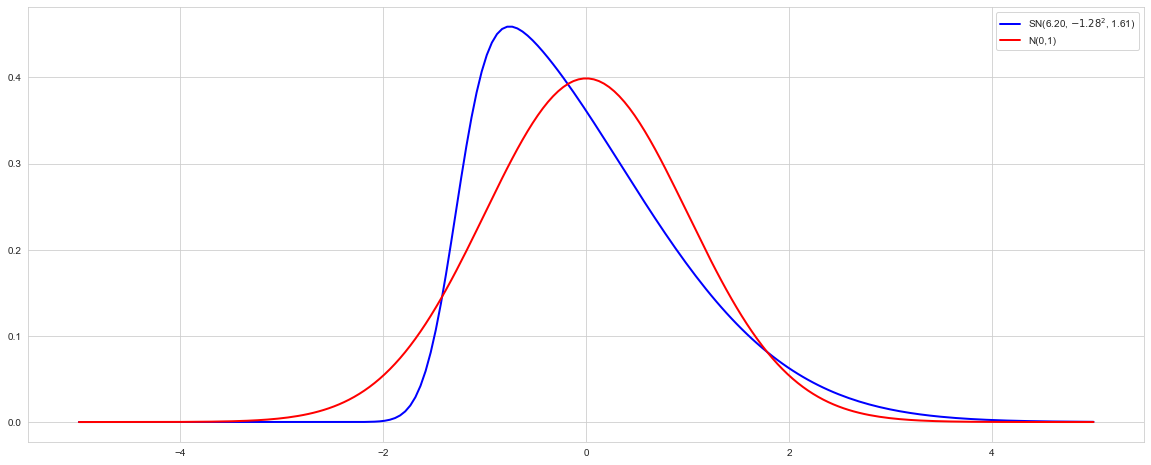

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
x = np.linspace(-5, 5, 200)
ax.plot(x, st.skewnorm.pdf(x, a=a4_t, loc=loc4_t, scale=scale4_t), 'b-', lw=2, label='SN(6.20, $-1.28^2$, 1.61)')
ax.plot(x, st.norm.pdf(x), 'r-', lw=2, label='N(0,1)')
ax.legend()
plt.show()